## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

## Read Dataset

In [3]:
df = pd.read_csv("datadotgov_ais20.csv")
df.head()

,abn,charity name,registration status,charity website,charity size,basic religious charity,ais due date,date ais received,financial report date received,conducted activities,...,fundraising number - qld,fundraising - sa,fundraising number - sa,fundraising - tas,fundraising number - tas,fundraising - vic,fundraising number - vic,fundraising - wa,fundraising number - wa,fundraising - online
0,11000047950,Sydney Missionary & Bible College,Registered,www.smbc.edu.au,Large,n,30/06/2021,08/06/2021,08/06/2021,y,...,NaN,n,NaN,n,NaN,n,NaN,n,NaN,n
1,11000073870,Integricare Limited,Registered,www.integricare.org.au,Large,n,31/01/2021,29/01/2021,29/01/2021,y,...,NaN,n,NaN,n,NaN,n,NaN,n,NaN,n
2,11000761571,AUSTRALIANS IN MISSION TOGETHER,Registered,www.amtglobal.com.au,Large,n,30/06/2021,28/06/2021,28/06/2021,y,...,CH2136,n,NaN,n,NaN,n,NaN,n,NaN,n
3,11001233790,The Greek Orthodox Church & Community Of The H...,Registered,NaN,Medium,n,31/01/2021,29/01/2021,29/01/2021,y,...,NaN,n,NaN,n,NaN,n,NaN,n,NaN,n
4,11001241005,Wangarang Industries Limited,Registered,https://www.wangarang.com.au,Large,n,31/01/2021,29/01/2021,29/01/2021,y,...,NaN,n,NaN,n,NaN,n,NaN,n,NaN,n


In [4]:
df.columns

Index(['abn', 'charity name', 'registration status', 'charity website',
       'charity size', 'basic religious charity', 'ais due date',
       'date ais received', 'financial report date received',
       'conducted activities', 'why charity did not conduct activities',
       'international activities details',
       'international activities undertaken - transferring goods or services overseas',
       'international activities undertaken - operating overseas including programs',
       'other international activities',
       'other international activities description',
       'how purposes were pursued', 'staff - full time', 'staff - part time',
       'staff - casual', 'total full time equivalent staff',
       'staff - volunteers', 'cash or accrual', 'type of financial statement',
       'report consolidated with more than one entity',
       'charity report has a modification', 'type of report modification',
       'charity has related party transactions',
       'charity ha

In [5]:
# choosing only the most appropriate features on which exploratory data analysis will be carried out to understand the data

data = df[["charity name", "registration status", "charity size", "staff - full time", "staff - part time", "staff - volunteers",
           "revenue from government", "donations and bequests", "revenue from goods and services", "revenue from investments", 
           "all other revenue", "total revenue", "other income", "total gross income", "employee expenses", "interest expenses",
           "grants and donations made for use in Australia", "grants and donations made for use outside Australia",
          "all other expenses", "total expenses", "net surplus/deficit", "other comprehensive income", "total comprehensive income",
           "total current assets", "non-current loans receivable", "other non-current assets", "total non-current assets",
           "total assets", "total current liabilities", "non-current loans payable", "other non-current liabilities", 
           "total non-current liabilities", "total liabilities", "net assets/liabilities"]]

In [6]:
data.head()

,charity name,registration status,charity size,staff - full time,staff - part time,staff - volunteers,revenue from government,donations and bequests,revenue from goods and services,revenue from investments,...,non-current loans receivable,other non-current assets,total non-current assets,total assets,total current liabilities,non-current loans payable,other non-current liabilities,total non-current liabilities,total liabilities,net assets/liabilities
0,Sydney Missionary & Bible College,Registered,Large,37,11,3,1153000,1004051,5912764,3975,...,0,30993759,30993759,34683737,925378,70000,82089,152089,1077467,33606270
1,Integricare Limited,Registered,Large,120,80,3,6271343,85250,7823475,574470,...,0,12546393,12546393,19148586,2568965,0,209735,209735,2778700,16369886
2,AUSTRALIANS IN MISSION TOGETHER,Registered,Large,2,2,1,0,2537967,51715,93486,...,0,3451441,3451441,8390670,593396,0,336,336,593732,7796938
3,The Greek Orthodox Church & Community Of The H...,Registered,Medium,1,0,50,15869,54722,177947,50107,...,0,0,2058485,2100908,2705,0,0,325481,328186,1772722
4,Wangarang Industries Limited,Registered,Large,42,123,0,2282916,9218,1978569,13493,...,0,2584562,2584562,4230710,1014463,0,64289,64289,1078752,3151958


## Exploratory Data Analysis

In [7]:
data.set_index(["charity name"], inplace = True)
#get summary statistics of the data
data.describe()

,staff - full time,staff - part time,staff - volunteers,revenue from government,donations and bequests,revenue from goods and services,revenue from investments,all other revenue,total revenue,other income,...,non-current loans receivable,other non-current assets,total non-current assets,total assets,total current liabilities,non-current loans payable,other non-current liabilities,total non-current liabilities,total liabilities,net assets/liabilities
count,51199.000000,5.119900e+04,51199.000000,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,...,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04,5.119900e+04
mean,10.150901,1.096285e+02,70.152659,1.747762e+06,2.369713e+05,1.116578e+06,9.319380e+04,2.413455e+05,3.435838e+06,4.064309e+04,...,1.461760e+05,5.194802e+06,5.543318e+06,7.626307e+06,1.536088e+06,4.670496e+05,6.368302e+05,1.122904e+06,2.700068e+06,4.926307e+06
std,120.046465,2.255770e+04,3391.137068,2.475236e+07,4.024871e+06,1.858099e+07,4.172070e+06,8.658258e+06,4.375633e+07,1.974874e+06,...,6.500529e+06,8.725994e+07,8.869232e+07,1.041375e+08,2.351790e+07,1.104573e+07,1.726317e+07,2.456701e+07,4.301925e+07,6.812480e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.266400e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.118628e+08
25%,0.000000,0.000000e+00,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.891000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000e+00,10.000000,0.000000e+00,6.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.720700e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,9.900500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.312000e+04
75%,1.000000,2.000000e+00,28.000000,5.000000e+04,2.875600e+04,4.416950e+04,2.204000e+03,1.000000e+04,4.374925e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,2.557000e+03,1.016956e+06,1.993650e+04,0.000000e+00,0.000000e+00,0.000000e+00,8.451200e+04,7.550015e+05
max,7992.000000,5.104130e+06,750000.000000,2.746791e+09,5.222524e+08,1.703358e+09,8.854709e+08,1.471063e+09,2.898331e+09,3.235681e+08,...,9.954540e+08,8.565599e+09,8.665421e+09,9.793515e+09,1.780834e+09,8.349130e+08,1.630516e+09,2.028645e+09,3.421478e+09,7.182982e+09


the problem is about predicting whether the NGOs and charities are at financial risk or not, so for that we will create a target variable. The target variable in this problem statement is; "Total Liabilities to Total Assets Ratio = Total Liabilities / Total Assets". The Total Liabilities to Total Assets Ratio is normally expressed as a percentage and indicates the level of ownership of the entity’s assets. The Total Liabilities to Total Assets Ratio can also be used to gain an understanding of the entity's net equity of the entity. The ratio measures the percentage of total assets that are financed with debt. A higher ratio indicates that more of the entity’s assets are funded with debt and therefore is a greater financial risk, while a lower ratio indicates the less of the entity’s assets are funded with debt and therefore the entity represents a lower financial risk. (source: https://www.transparency.gov.au/financial-ratios)

In [8]:
data["total liability ratio"] = data["total liabilities"] / data["total assets"]
data.head()

C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\2140304149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["total liability ratio"] = data["total liabilities"] / data["total assets"]


,registration status,charity size,staff - full time,staff - part time,staff - volunteers,revenue from government,donations and bequests,revenue from goods and services,revenue from investments,all other revenue,...,other non-current assets,total non-current assets,total assets,total current liabilities,non-current loans payable,other non-current liabilities,total non-current liabilities,total liabilities,net assets/liabilities,total liability ratio
charity name,,,,,,,,,,,,,,,,,,,,,
Sydney Missionary & Bible College,Registered,Large,37,11,3,1153000,1004051,5912764,3975,1668,...,30993759,30993759,34683737,925378,70000,82089,152089,1077467,33606270,0.031065
Integricare Limited,Registered,Large,120,80,3,6271343,85250,7823475,574470,105745,...,12546393,12546393,19148586,2568965,0,209735,209735,2778700,16369886,0.145113
AUSTRALIANS IN MISSION TOGETHER,Registered,Large,2,2,1,0,2537967,51715,93486,574396,...,3451441,3451441,8390670,593396,0,336,336,593732,7796938,0.070761
The Greek Orthodox Church & Community Of The Holy Apostles City Of Newcastle & District Limited,Registered,Medium,1,0,50,15869,54722,177947,50107,52231,...,0,2058485,2100908,2705,0,0,325481,328186,1772722,0.156212
Wangarang Industries Limited,Registered,Large,42,123,0,2282916,9218,1978569,13493,51638,...,2584562,2584562,4230710,1014463,0,64289,64289,1078752,3151958,0.254981


In [9]:
#get null values in each column
data.isnull().sum()

registration status                                        0
charity size                                               6
staff - full time                                          0
staff - part time                                          0
staff - volunteers                                         0
revenue from government                                    0
donations and bequests                                     0
revenue from goods and services                            0
revenue from investments                                   0
all other revenue                                          0
total revenue                                              0
other income                                               0
total gross income                                         0
employee expenses                                          0
interest expenses                                          0
grants and donations made for use in Australia             0
grants and donations mad

In [10]:
#dropping the null values from data
data.dropna(axis = 0, inplace = True)

#check if there are any null values in the dataset now
data.isnull().sum()

C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\3731490799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis = 0, inplace = True)


registration status                                    0
charity size                                           0
staff - full time                                      0
staff - part time                                      0
staff - volunteers                                     0
revenue from government                                0
donations and bequests                                 0
revenue from goods and services                        0
revenue from investments                               0
all other revenue                                      0
total revenue                                          0
other income                                           0
total gross income                                     0
employee expenses                                      0
interest expenses                                      0
grants and donations made for use in Australia         0
grants and donations made for use outside Australia    0
all other expenses             

##### it seems there are some infinite values in the total liabilities ratio, we will drop them

In [11]:
index_inf = data.loc[data["total liability ratio"] == np.inf].index
print(f"Number of rows with value inf: {len(index_inf)}")
data.drop(index = index_inf, inplace = True)

Number of rows with value inf: 117


C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\2369284593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index = index_inf, inplace = True)


In [12]:
#taking a look at the data types of the dataset columns
data.dtypes

registration status                                     object
charity size                                            object
staff - full time                                        int64
staff - part time                                        int64
staff - volunteers                                       int64
revenue from government                                  int64
donations and bequests                                   int64
revenue from goods and services                          int64
revenue from investments                                 int64
all other revenue                                        int64
total revenue                                            int64
other income                                             int64
total gross income                                       int64
employee expenses                                        int64
interest expenses                                        int64
grants and donations made for use in Australia         

Taking a look at the dataset reveals that all features except two are numeric, the features; registration status and charity size are categorical.

charity size
Small     23737
Large      8569
Medium     6740
Name: count, dtype: int64


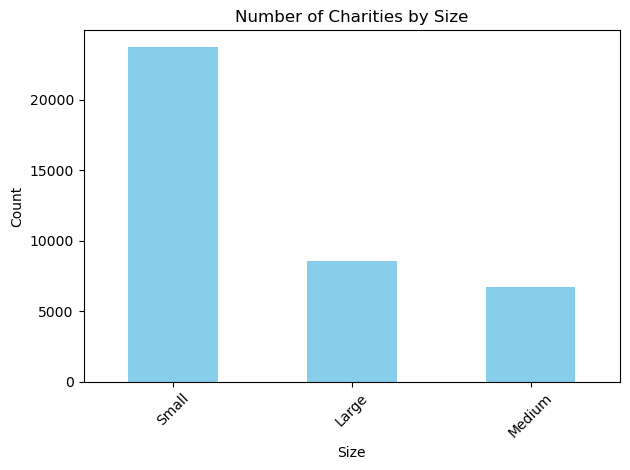

In [13]:
#types of NGOs and charities by size

print(data["charity size"].value_counts())
data["charity size"].value_counts().plot.bar(color="skyblue")
plt.title("Number of Charities by Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

registration status
Registered                                                            35642
Voluntarily Revoked No Longer Operating                                2106
Voluntarily Revoked Merged                                              573
Revoked Double Defaulter                                                240
Voluntarily Revoked Not Entitled To Be A Charity                        229
Voluntarily Revoked Continuing But No Longer Wants To Be A Charity      139
Revoked ABN                                                              62
Revoked Compliance                                                       27
Revoked Registration                                                     23
Revoked RTS                                                               5
Name: count, dtype: int64


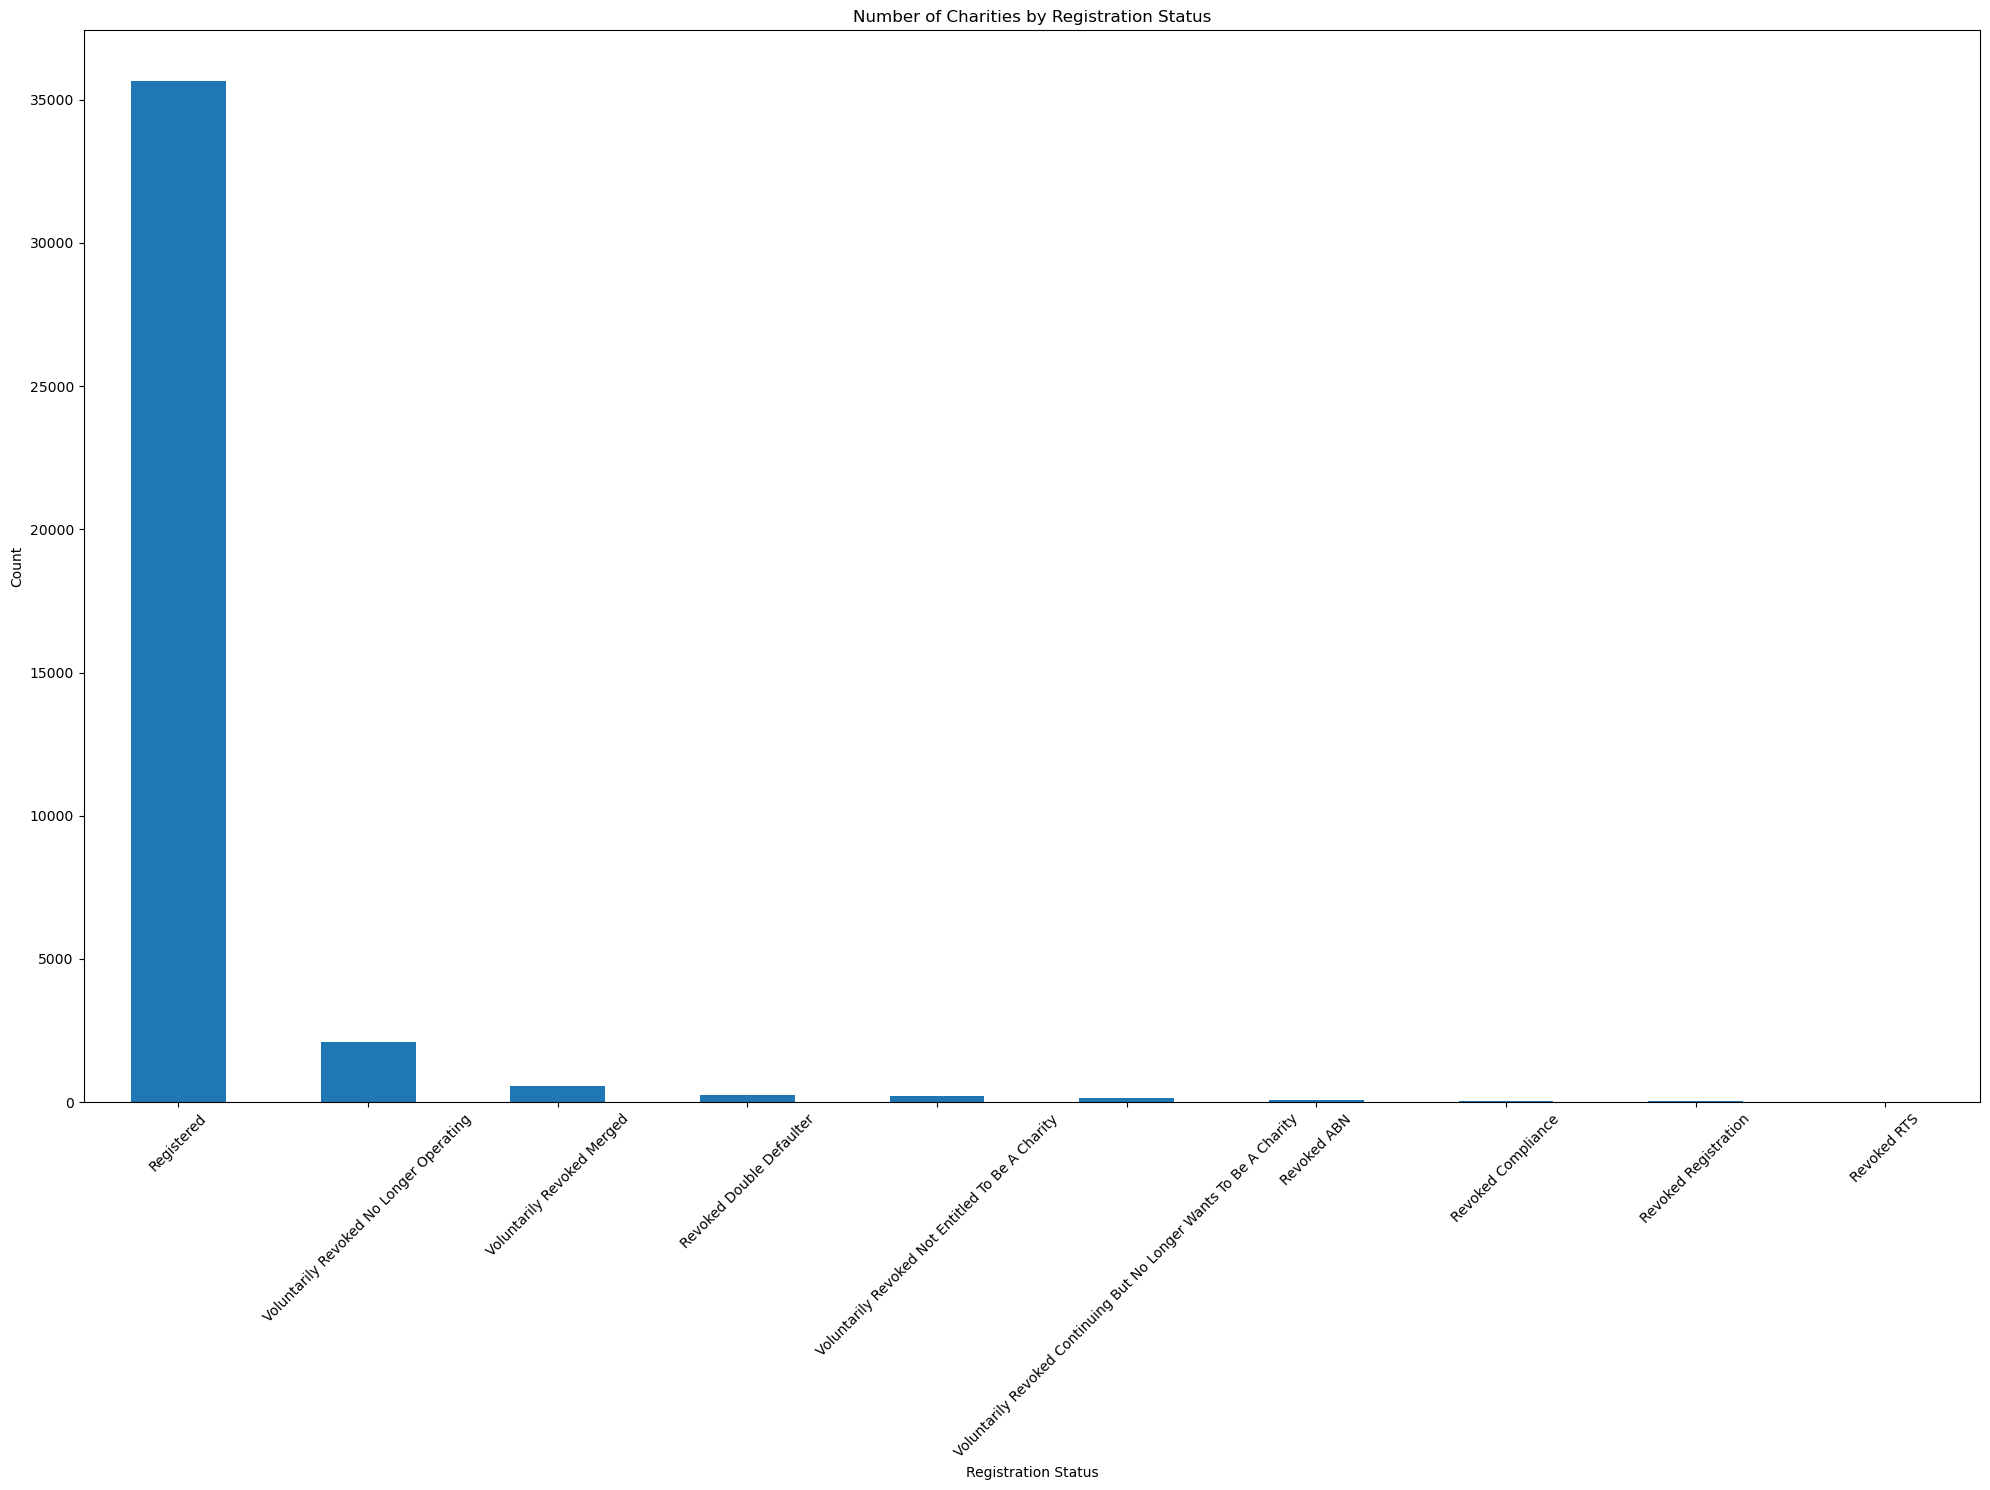

In [14]:
print(data["registration status"].value_counts())
plt.figure(figsize = (20, 15))
data["registration status"].value_counts().plot.bar()
plt.title("Number of Charities by Registration Status")
plt.xlabel("Registration Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

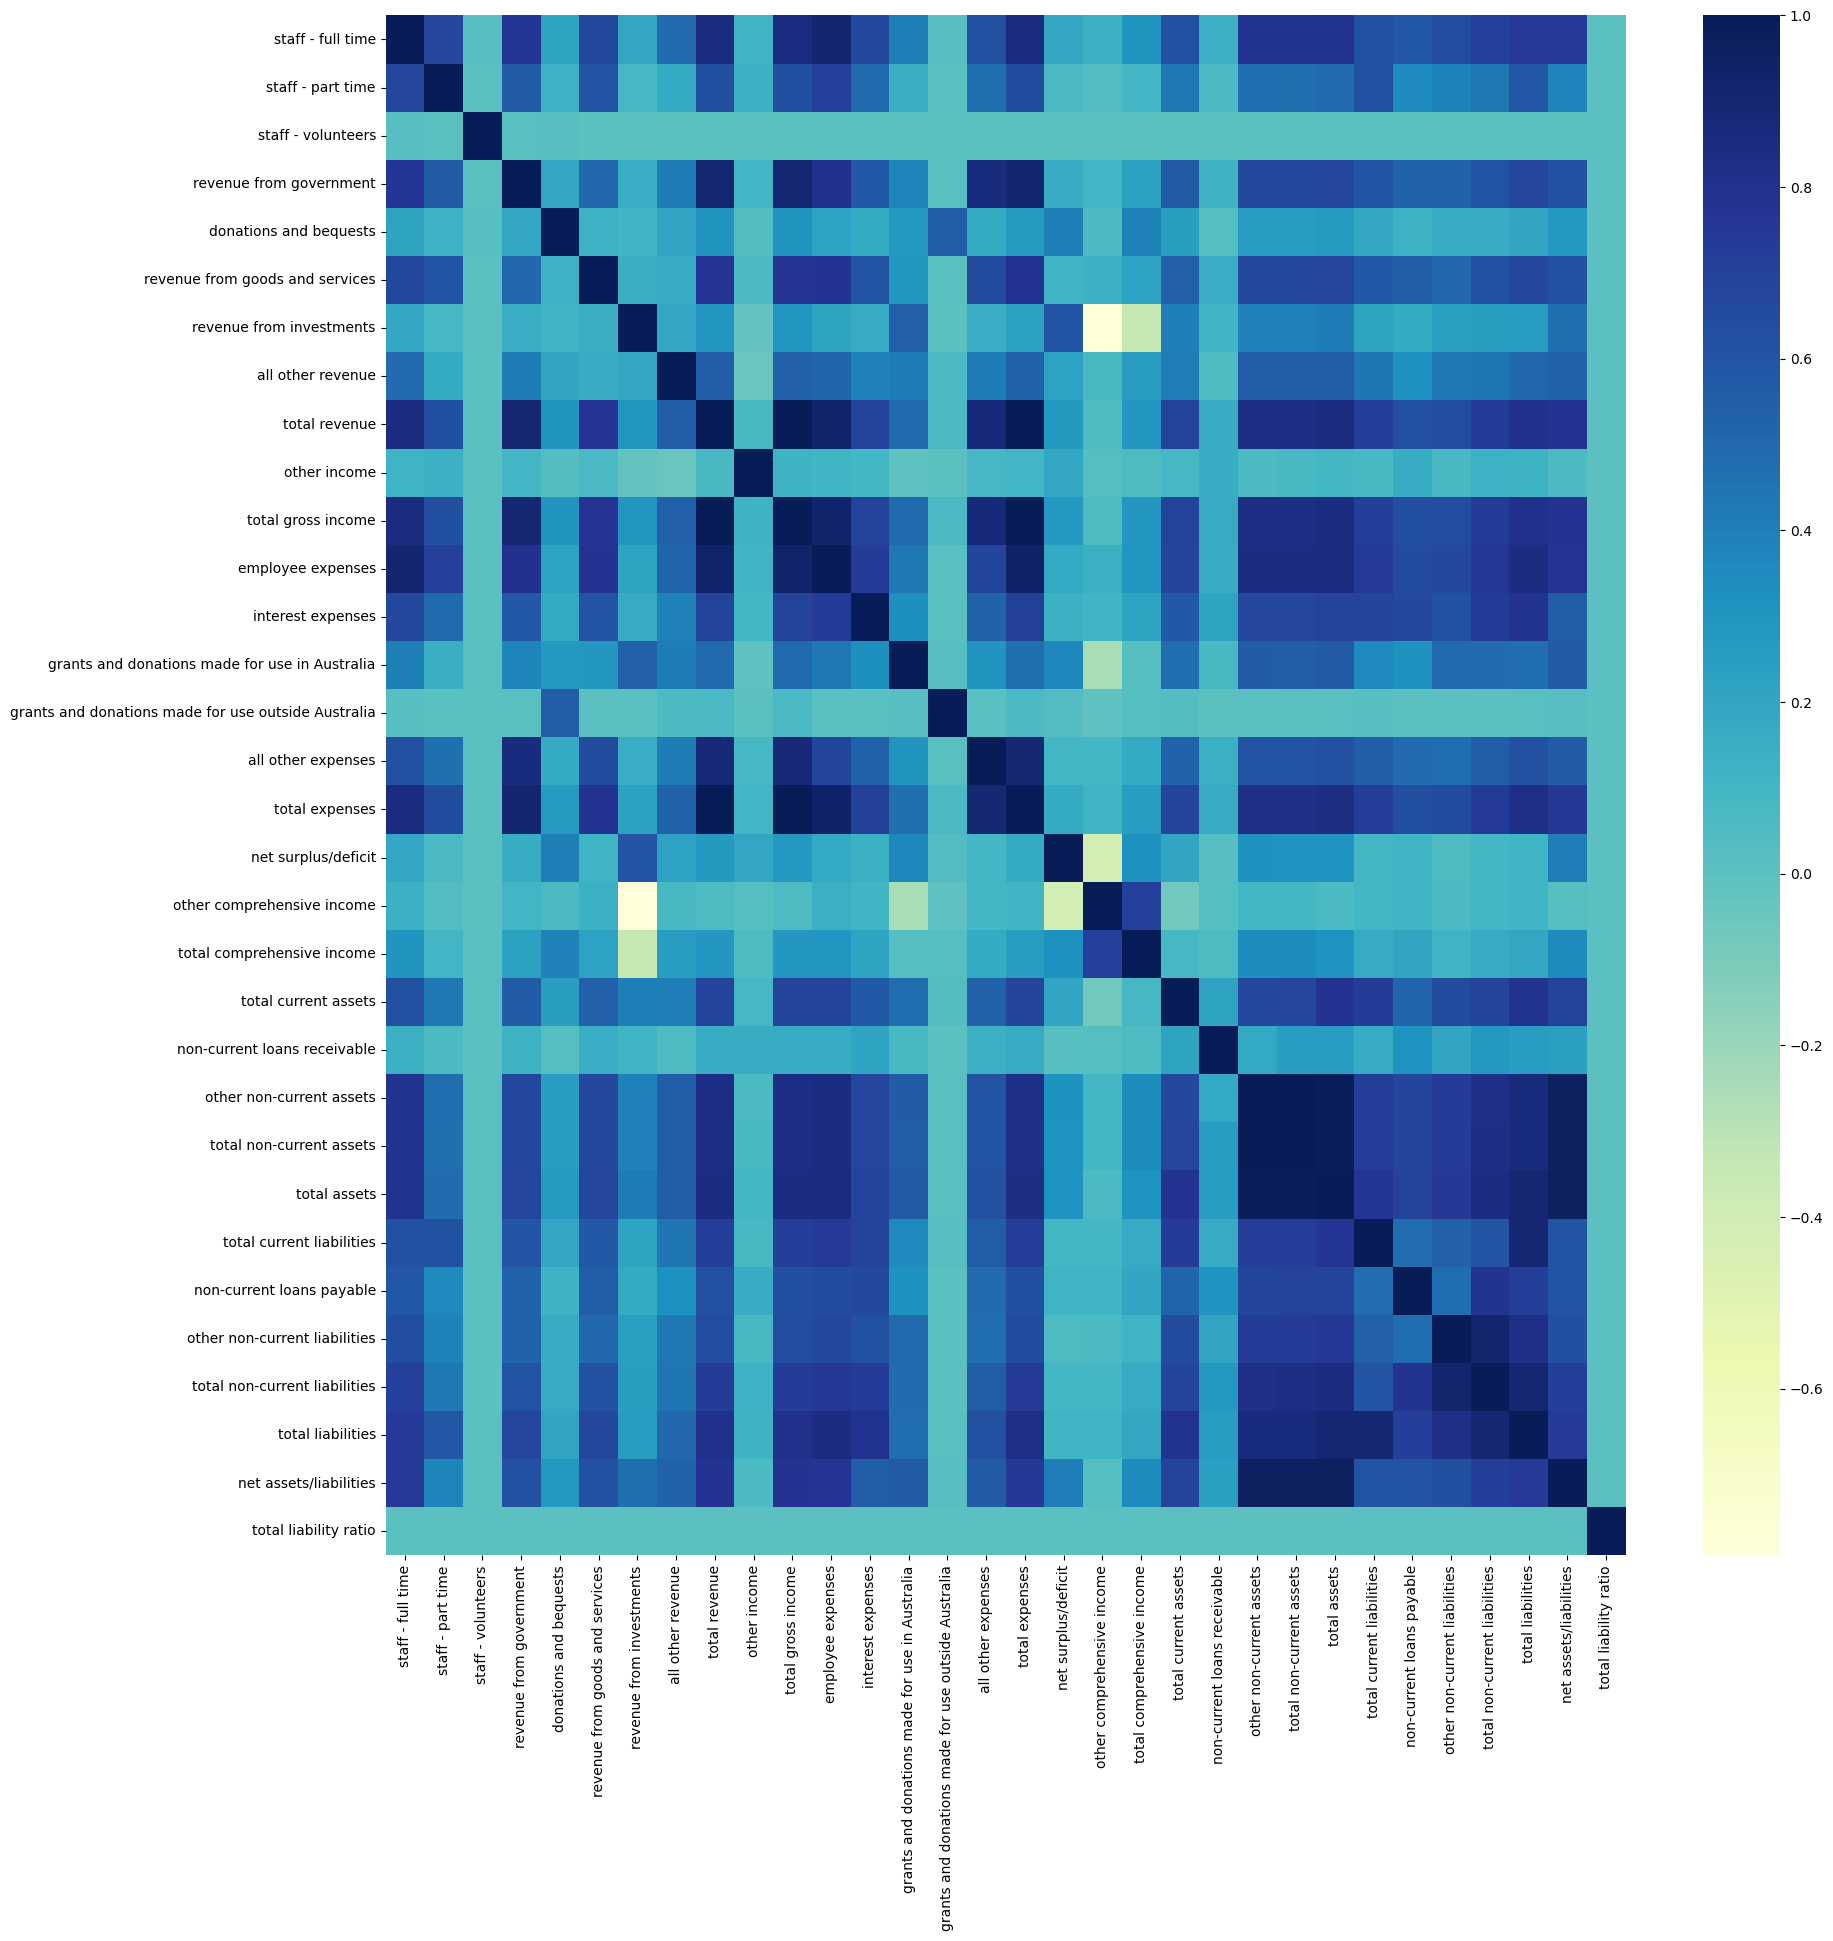

In [15]:
#correlation matrix
plt.figure(figsize = (20, 20))

correlation_ = data.corr(numeric_only = True)
sns.heatmap(correlation_, cmap="YlGnBu")
plt.show()

The Correlation heatmap given here gives us an idea of how different features are correlated with each other and to the target variable, "total liability ratio". Some features are highly correlated with each other and they may be redundant. To minimise redundancy, one of the highly correlated features will be dropped. The features that will be dropped based on the heatmap are- "other non-current assets", "total non-current assets", "all other expenses", "net assets/liabilities", "total assets", "revenue from government", "revenue from goods and services", "employee expenses", "other non-current liabilities", "total non-current liabilities", "total gross income"


In [16]:
data.drop(columns = ["other non-current assets", "total non-current assets", "all other expenses", "net assets/liabilities",
           "total assets", "revenue from government", "revenue from goods and services", "employee expenses",
            "other non-current liabilities", "total non-current liabilities", "total gross income"], axis = 1, inplace = True)

C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\1077326143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ["other non-current assets", "total non-current assets", "all other expenses", "net assets/liabilities",


In [20]:
data.drop(columns = ["total gross income"], inplace = True)

C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\3867285940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ["total gross income"], inplace = True)


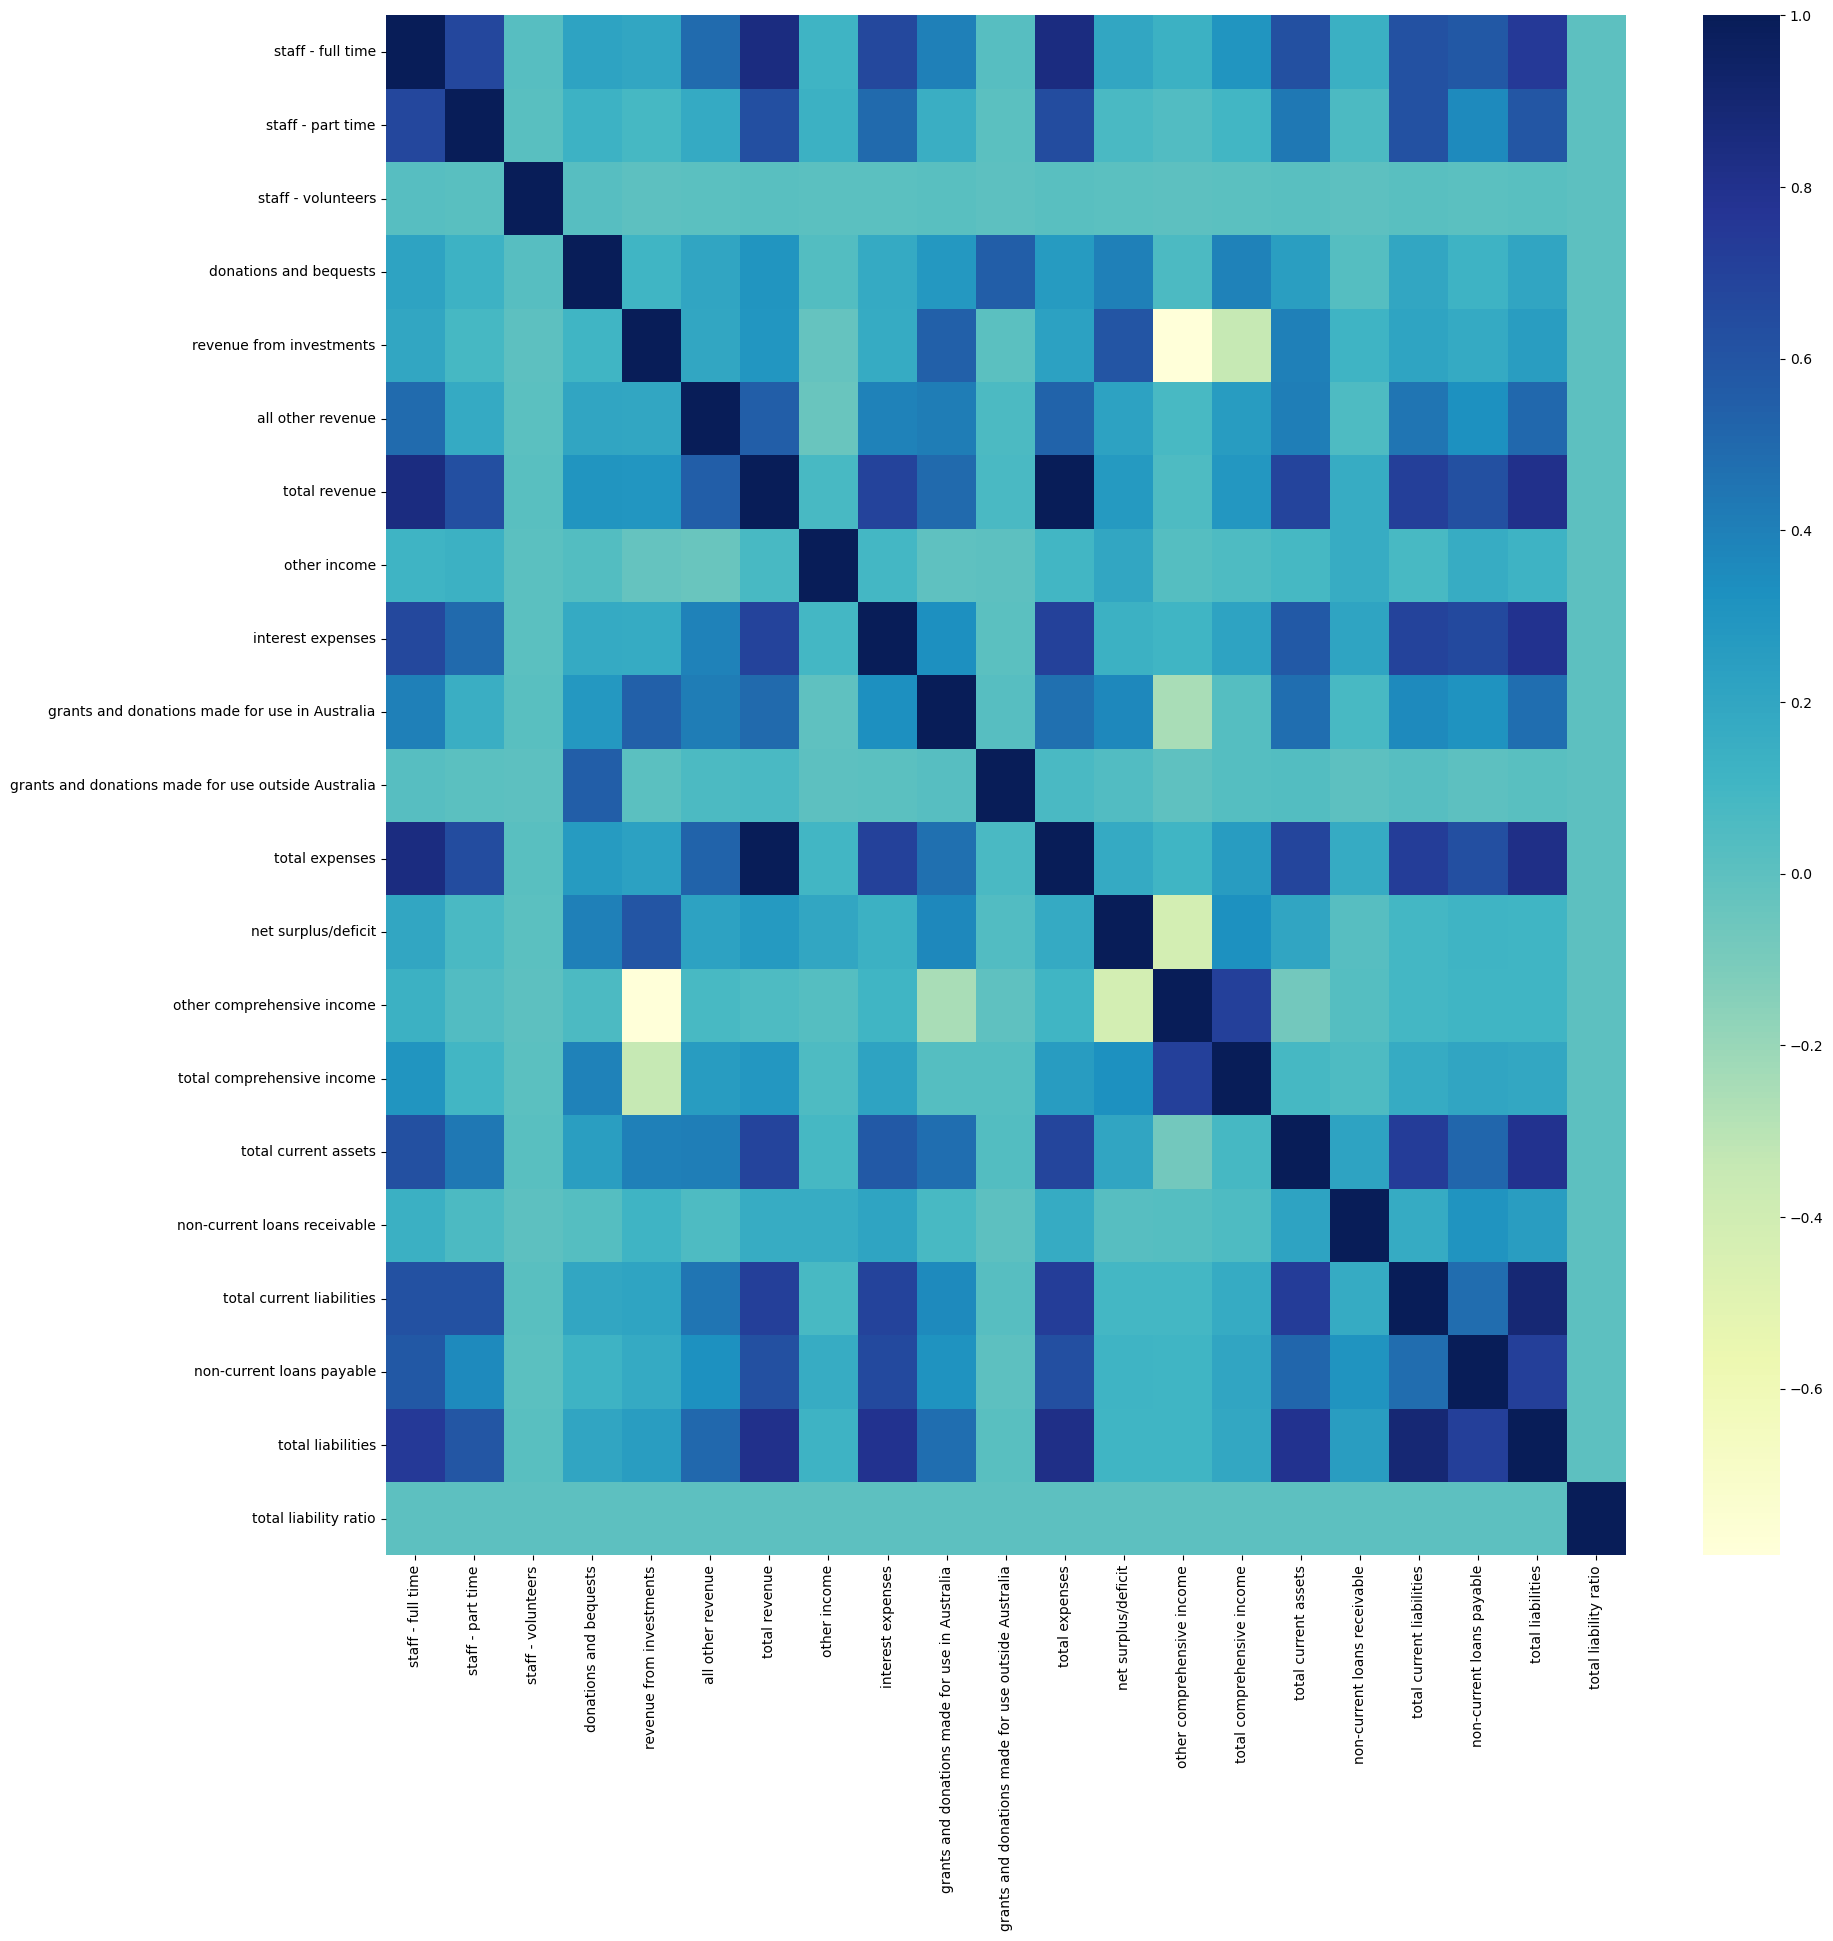

In [21]:
#create a heatmap to see the correlations again
plt.figure(figsize = (20, 20))

correlation_ = data.corr(numeric_only = True)
sns.heatmap(correlation_, cmap="YlGnBu")
plt.show() 

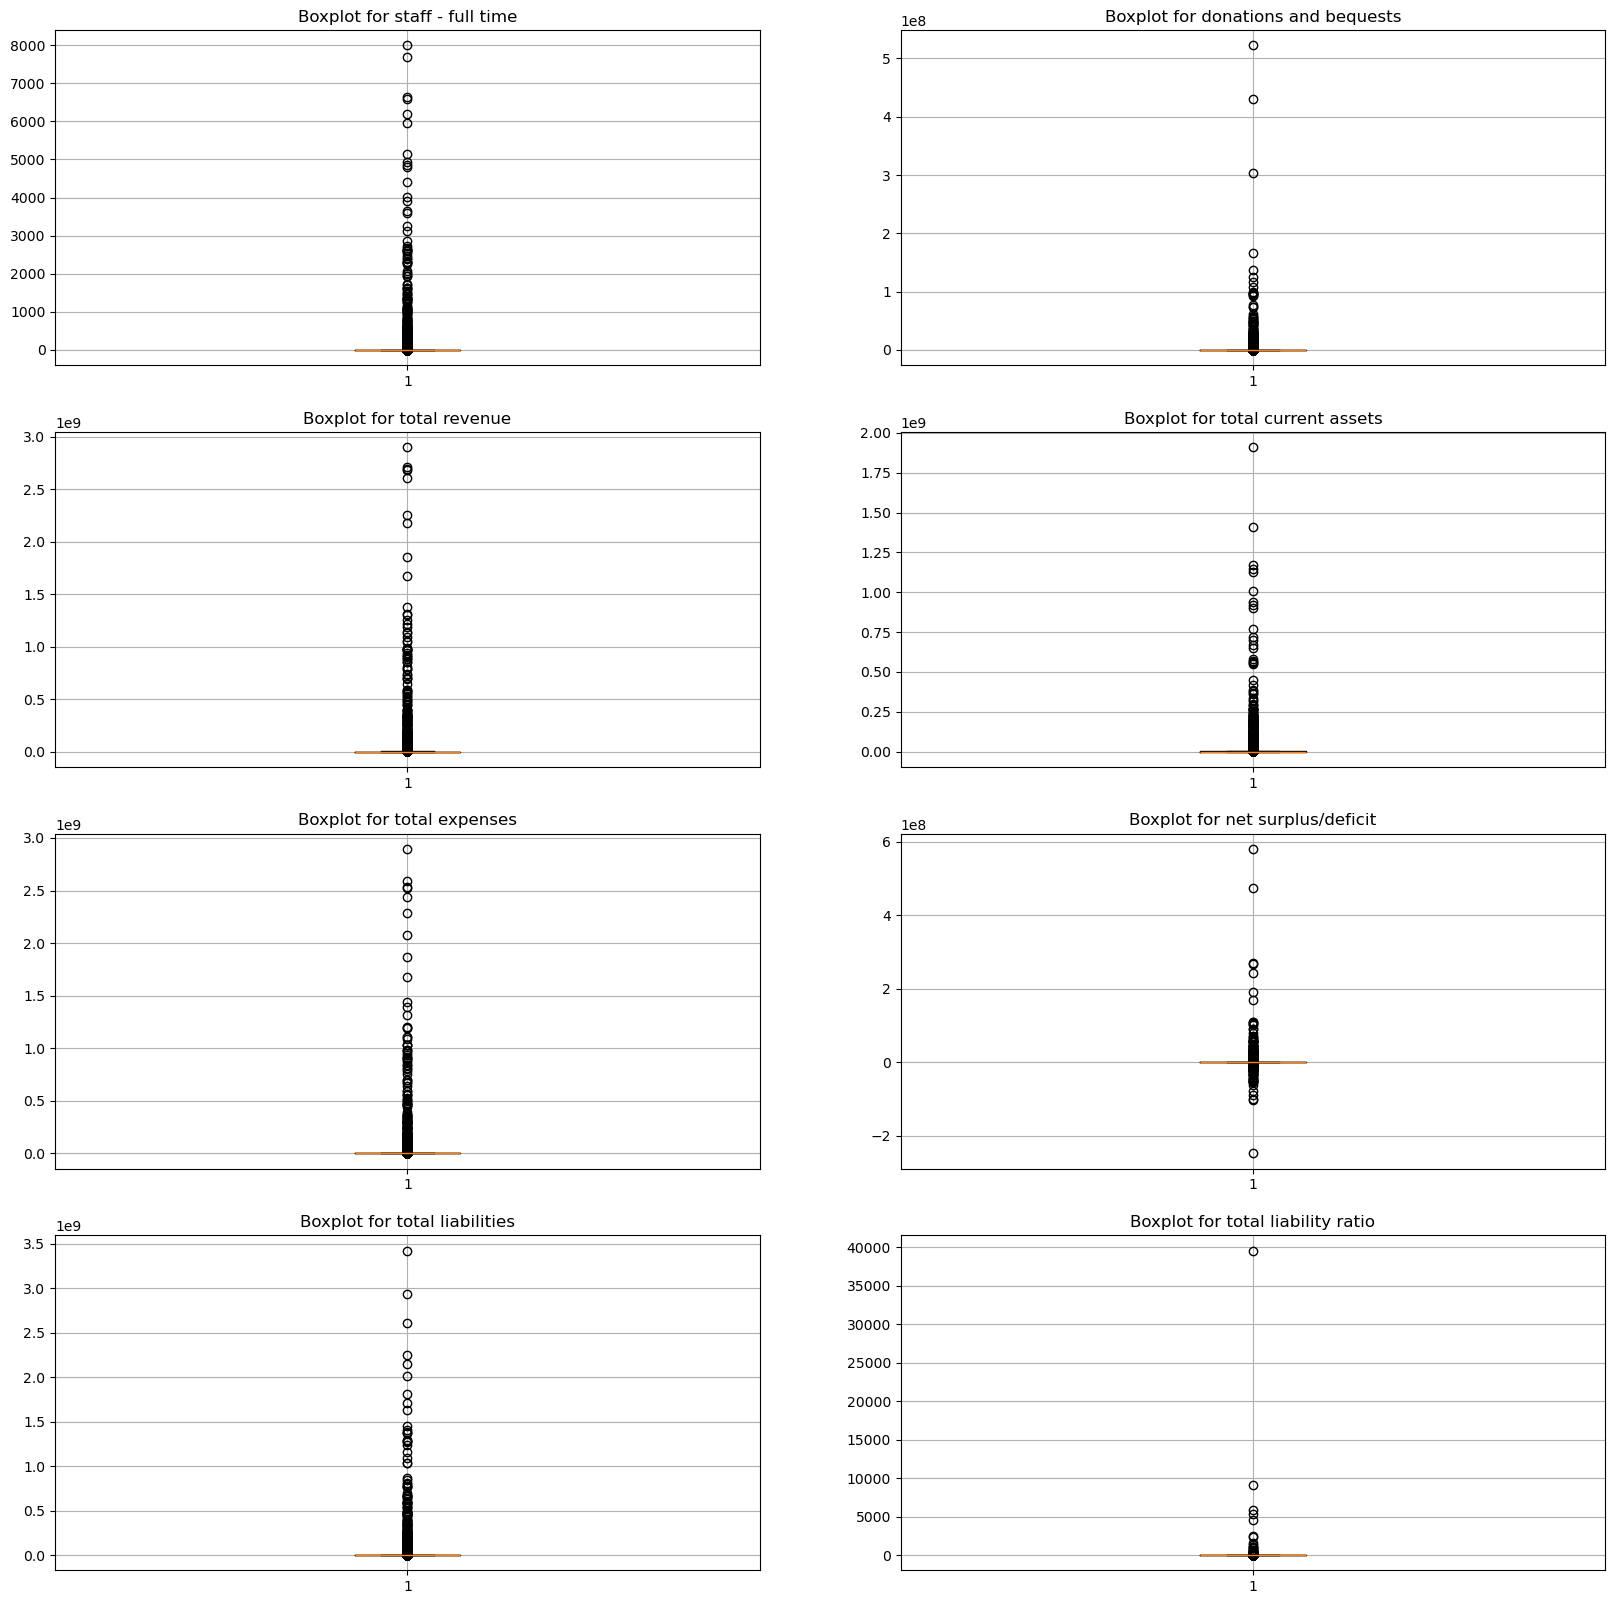

In [26]:
#drawing boxplots observe outliers and data spread for numeric columns
cols = ["staff - full time", "donations and bequests", "total revenue", "total current assets", "total expenses",
        "net surplus/deficit", "total liabilities", "total liability ratio"]

fig, ax = plt.subplots(4, 2, figsize = (20, 20))
for i, j in zip(range(0,len(cols)-1, 2), range(4)):
        ax[j, 0].boxplot(data[cols[i]])
        ax[j, 0].set_title(f"Boxplot for {cols[i]}")
        ax[j, 0].grid()
        
        ax[j, 1].boxplot(data[cols[i+1]])
        ax[j, 1].set_title(f"Boxplot for {cols[i+1]}")
        ax[j, 1].grid()


plt.show()

# plt.title("Boxplots for Numeric Columns")


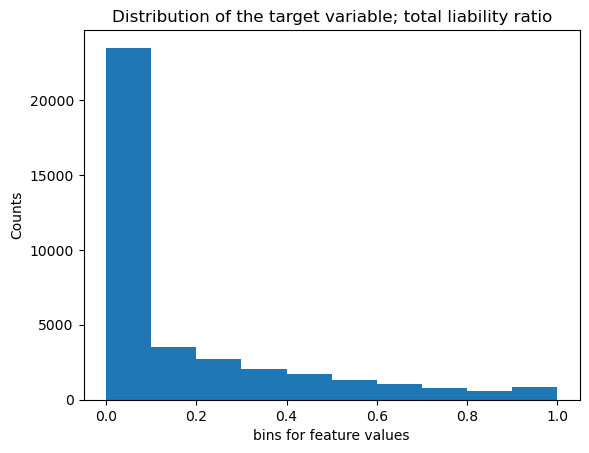

In [27]:
#creating a histogram for total liabilities ratio
plt.hist(data["total liability ratio"], bins = 10, range=[0,1], stacked = True)
plt.title("Distribution of the target variable; total liability ratio")
plt.xlabel("bins for feature values")
plt.ylabel("Counts")
plt.show()

## Data Preprocessing

### Encoding categorical labels

We use RobustScaler here because as depcited by the boxplots created above, many of the features have a lot of outliers. Robust Scaler uses robust statistics, i.e, values thay are not affected by the presence of outliers so outliers have no impact on this scaler method. Robust Scaler removes median and scales data according to the quantile range, making it less sensitive to extreme values.

In [40]:
from sklearn.preprocessing import StandardScaler
# there are three features in the dataset with categorical values - "registration status", "charity size"
ordinal_enc = OrdinalEncoder() #ordinal encoder for chairty size because the values are- small, medium, large
label_enc = LabelEncoder() #label encoder for registration status

data["charity size"] = ordinal_enc.fit_transform(data[["charity size"]])
data["registration status"] = label_enc.fit_transform(data[["registration status"]])

#normalise the dataset using StandardScaler
scaler = StandardScaler()
norm_data = scaler.fit_transform(data)
data_ = pd.DataFrame(norm_data, columns = data.columns)
data_.head()

C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\1428825452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["charity size"] = ordinal_enc.fit_transform(data[["charity size"]])
C:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_35584\1428825452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,registration status,charity size,staff - full time,staff - part time,staff - volunteers,donations and bequests,revenue from investments,all other revenue,total revenue,other income,...,total expenses,net surplus/deficit,other comprehensive income,total comprehensive income,total current assets,non-current loans receivable,total current liabilities,non-current loans payable,total liabilities,total liability ratio
0,-0.300189,-1.688138,0.178735,-0.012181,-0.020564,0.150876,-0.024662,-0.031621,0.072583,-0.007827,...,0.054584,0.170052,-0.002407,0.135161,0.054514,-0.025752,-0.040458,-0.042897,-0.050019,-0.011249
1,-0.300189,-1.688138,0.789564,0.570492,-0.020564,-0.048595,0.094764,-0.021122,0.208128,-0.022184,...,0.209952,0.014817,-0.002407,0.009930,0.175203,-0.025752,0.020615,-0.048432,-0.015462,-0.010711
2,-0.300189,-1.688138,-0.078844,-0.088182,-0.021079,0.483889,-0.005924,0.026153,-0.023667,-0.023505,...,-0.013237,-0.106474,-0.002407,-0.087917,0.106286,-0.025752,-0.052793,-0.048432,-0.059845,-0.011062
3,-0.300189,-0.472308,-0.086203,-0.105071,-0.008458,-0.055223,-0.015005,-0.026521,-0.081736,-0.023505,...,-0.080653,-0.034919,-0.002407,-0.030192,-0.096649,-0.025752,-0.074742,-0.048432,-0.065238,-0.010659
4,-0.300189,-1.688138,0.215532,0.933608,-0.021337,-0.065102,-0.022669,-0.026580,-0.002126,-0.022902,...,-0.002294,-0.008283,-0.002407,-0.008705,-0.030187,-0.025752,-0.037147,-0.048432,-0.049993,-0.010193


In [41]:
#dividng the dataset into X and y
X = data_.drop(["total liability ratio"], axis = 1)
y = data_["total liability ratio"]

#Splitting the dataset into train, test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Number of rows in the train dataset: ", x_train.shape)
print("Number of rows in the test dataset: ", x_test.shape)

Number of rows in the train dataset:  (31236, 22)
Number of rows in the test dataset:  (7810, 22)


### Training DecisionTrees to find the most suitable features

#### Training DecisionTrees Model for feature selection

In [42]:
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_dt)
print(mse)

dt_model.feature_importances_

0.10264353832224092


array([2.76004121e-03, 1.08811377e-09, 2.20275593e-06, 2.71480715e-05,
       2.30742047e-02, 8.83122005e-04, 1.78918668e-06, 3.88163104e-06,
       2.17280099e-03, 1.83271278e-04, 5.30072403e-08, 9.54707526e-06,
       3.05773346e-05, 1.48161139e-02, 2.32674069e-02, 1.59834445e-09,
       1.62624547e-06, 2.56653536e-04, 2.68951950e-04, 1.51603900e-03,
       6.50912392e-09, 9.30724560e-01])

In [43]:
rf_model = RandomForestRegressor(random_state = 42)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rf)
print(mse)

0.07942622331489974


In [55]:
mlp_model = MLPRegressor(hidden_layer_sizes = [500], random_state = 42)

mlp_model.fit(x_train, y_train)
y_pred_mlp = mlp_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_mlp)
print(mse)

0.007351402895720916


In [56]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.006080862001400936
